In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import ParameterGrid

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import tree
import graphviz

%matplotlib inline

In [2]:
# metrics for each class + weighted average (- bad impact)
# micro f1 = accuracy
def print_metrics(cls, X_test, y_test):
    sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
    print('accuracy: ',metrics.accuracy_score(y_test, cls.predict(X_test)))
    print()
    print(metrics.classification_report(y_test, cls.predict(X_test)))
    print('macro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='macro'))
    print('micro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='micro'))
    print()
    print('micro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='micro'))
    print('macro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='macro'))
    print()
    print('micro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='micro'))
    print('macro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='macro'))
    plt.show()

In [24]:
df = pd.read_csv('data/normalized/original.csv', index_col=0)

In [25]:
df = df[(df['ratio_running_duration'] >= 25) & (df['ratio_running_duration'] < 50)]

In [21]:
df['test'] = df['ratio_pledged_goal'] * df['ratio_running_duration'] / 100

In [36]:
df.drop('ratio_running_duration_original', axis=1, inplace=True)

In [26]:
# split to train and test sets
features, featuresCV, labels, labelsCV = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.30, random_state=16)

In [27]:
features.shape

(5446, 40)

# DecisionTree

In [86]:
cls = DecisionTreeClassifier

In [169]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'], # je vhodne skusat random?
    'max_depth': range(1, 20),
    'min_samples_split': range(1, 60, 10),
    'min_samples_leaf': range(1, 20, 5),
    #'min_weight_fraction_leaf': ,
    'max_features': [5, 10, 20, 30, 40],
    'random_state': [64],
    #'max_leaf_nodes': ,
    #'min_impurity_decrease': [0.0],
    'class_weight': [None, 'balanced']
}

In [7]:
len(list(ParameterGrid(params)))

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


NameError: name 'params' is not defined

In [171]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=10, n_jobs=-1, error_score=0)

In [172]:
%%time
gs.fit(features, labels)

Wall time: 45min 40s


GridSearchCV(cv=10, error_score=0,
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': range(1, 20), 'min_samples_split': range(1, 60, 10), 'min_samples_leaf': range(1, 20, 5), 'max_features': [5, 10, 20, 30, 40], 'random_state': [64], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [173]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)[:5]

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80187, std: 0.01737, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 40, 'min_samples_leaf': 1, 'min_samples_split': 11, 'random_state': 64, 'splitter': 'best'},
 mean: 0.80187, std: 0.01737, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 40, 'min_samples_leaf': 1, 'min_samples_split': 21, 'random_state': 64, 'splitter': 'best'},
 mean: 0.80187, std: 0.01737, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 40, 'min_samples_leaf': 1, 'min_samples_split': 31, 'random_state': 64, 'splitter': 'best'},
 mean: 0.80187, std: 0.01737, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 40, 'min_samples_leaf': 1, 'min_samples_split': 41, 'random_state': 64, 'splitter': 'best'},
 mean: 0.80187, std: 0.01737, params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 40, 'min_samples_leaf': 1, 'min_samples_spl

In [174]:
gs.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 11,
 'random_state': 64,
 'splitter': 'best'}

In [175]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=40, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=11,
            min_weight_fraction_leaf=0.0, presort=False, random_state=64,
            splitter='best')

In [176]:
dot_data = tree.export_graphviz(gs.best_estimator_, out_file=None, feature_names=X_train.columns, class_names=['1','2','3','4'],filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("tree.gv", view=True)

'tree.gv.pdf'

accuracy:  0.797002141328

             precision    recall  f1-score   support

          1       0.94      0.97      0.96       954
          2       0.53      0.64      0.58       275
          3       0.66      0.59      0.63       546
          4       0.82      0.78      0.80       560

avg / total       0.80      0.80      0.80      2335

macro precision:  0.738148010449
micro precision:  0.797002141328

micro recall:  0.797002141328
macro recall:  0.744920815558

micro f1:  0.797002141328
macro f1:  0.739624822125


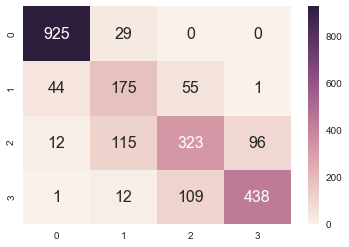

In [177]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

## testing Feature importances

In [188]:
cls_best = RandomForestClassifier()

In [189]:
cls_best.fit(features, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

accuracy:  0.789721627409

             precision    recall  f1-score   support

          1       0.94      0.97      0.95       954
          2       0.51      0.52      0.52       275
          3       0.63      0.66      0.65       546
          4       0.83      0.75      0.79       560

avg / total       0.79      0.79      0.79      2335

macro precision:  0.728669379461
micro precision:  0.789721627409

micro recall:  0.789721627409
macro recall:  0.723502992029

micro f1:  0.789721627409
macro f1:  0.725389039777


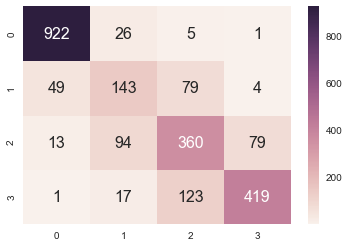

In [190]:
print_metrics(cls_best, featuresCV, labelsCV)

In [191]:
importances = pd.DataFrame()
for i, name, importance in zip(range(len(features.columns)), features.columns, cls_best.feature_importances_):
    importances.loc[i, 'feature'] = name
    importances.loc[i, 'importance'] = importance

In [192]:
importances.sort_values(by='importance', ascending=False)

,feature,importance
28,ratio_pledged_goal,0.251307
40,test,0.162123
42,test3,0.093573
24,backers_count,0.076895
23,average_pledge,0.052014
30,usd_pledged,0.026328
5,usd_goal,0.025097
27,pledged,0.021978
4,goal,0.017953
41,test2,0.017741


(0, 100)

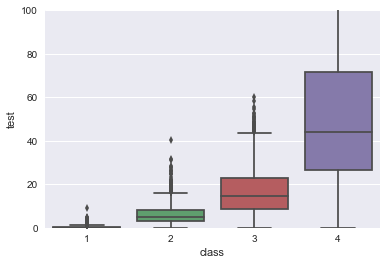

In [66]:
sns.boxplot(x=df['class'], y=df['test'])
plt.ylim(0, 100)

(0, 200)

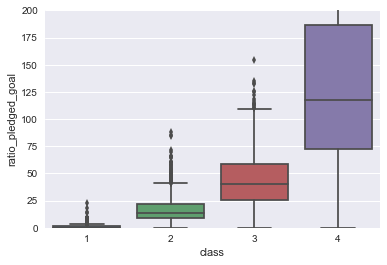

In [81]:
sns.boxplot(x=df['class'], y=df['ratio_pledged_goal'])
plt.ylim(0, 200)

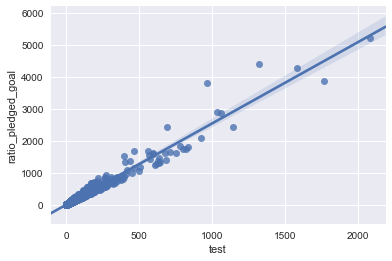

In [82]:
sns.regplot(x=df['test'], y=df['ratio_pledged_goal'])

In [64]:
df['test2'] = df['usd_goal']/df['days_duration'] # daily goal

In [67]:
len(df.columns)

44

In [66]:
df['test3'] = df['usd_pledged'] - df['test2']*df['days_running'] # difference in pledged and daily goal * days running # also /usd_goal ?

(-10000.0, 10000.0)

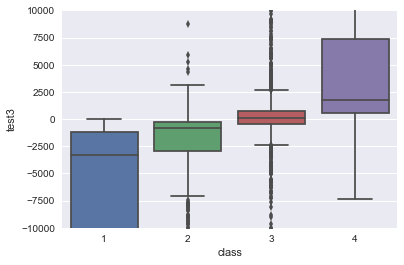

In [117]:
sns.boxplot(x=df['class'], y=df['test3'])
plt.ylim(-10e3, 10e3)

## GradientBoosting

# 

In [21]:
from sklearn.ensemble import GradientBoostingClassifier #top

In [77]:
cls = GradientBoostingClassifier

In [111]:
params = {
    'learning_rate': [0.12, 0.1, 0.08, 0.01], # 0.1
    'n_estimators': [150, 100, 50],
    'max_depth': [1, 2, 3], # 2
    #'criterion': ['friedman_mse', 'mse'],
    #'min_samples_split': [2, 5, 10, 1.0, 3.0, 5.0, 10.0] # 2
    #'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10] # 1
}

In [112]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)

In [113]:
from sklearn.grid_search import ParameterGrid
len(list(ParameterGrid(params)))

36

In [114]:
# zhorsenie
from sklearn.utils import class_weight
labels_weights = class_weight.compute_sample_weight('balanced', labels)

In [115]:
%%time
gs.fit(features, labels)
#gs.fit(features, labels, sample_weight=labels_weights)

Wall time: 4min


GridSearchCV(cv=5, error_score=0,
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.12, 0.1, 0.08, 0.01], 'n_estimators': [150, 100, 50], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [116]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.79949, std: 0.01386, params: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50},
 mean: 0.79930, std: 0.01504, params: {'learning_rate': 0.12, 'max_depth': 1, 'n_estimators': 50},
 mean: 0.79930, std: 0.01651, params: {'learning_rate': 0.08, 'max_depth': 1, 'n_estimators': 100},
 mean: 0.79930, std: 0.01602, params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150},
 mean: 0.79875, std: 0.01811, params: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100},
 mean: 0.79857, std: 0.01359, params: {'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 50},
 mean: 0.79838, std: 0.01731, params: {'learning_rate': 0.12, 'max_depth': 1, 'n_estimators': 100},
 mean: 0.79820, std: 0.01652, params: {'learning_rate': 0.12, 'max_depth': 2, 'n_estimators': 50},
 mean: 0.79820, std: 0.01556, params: {'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 50},
 mean: 0.79783, std: 0.01783, params: {'learning_rate': 0.08, 'max_depth': 1, 'n_estimators': 150},
 mean: 

In [102]:
best = gs.best_estimator_

In [ ]:
best.fit(features, labels, sample_weight=)

In [71]:
from sklearn.linear_model import LogisticRegression #original?
base_cls = LogisticRegression(multi_class='multinomial', solver='newton-cg')
base_cls.fit(features, labels)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
cls = GradientBoostingClassifier(criterion='mse', verbose=1, n_estimators=200, init=base_cls)
cls.fit(features, labels)

      Iter       Train Loss   Remaining Time 


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


IndexError: too many indices for array

accuracy:  0.78886509636

             precision    recall  f1-score   support

          1       0.95      0.94      0.94       954
          2       0.48      0.71      0.57       275
          3       0.67      0.60      0.63       546
          4       0.85      0.76      0.80       560

avg / total       0.81      0.79      0.79      2335

macro precision:  0.738278880772
micro precision:  0.78886509636

micro recall:  0.78886509636
macro recall:  0.752296160339

micro f1:  0.78886509636
macro f1:  0.738377563968


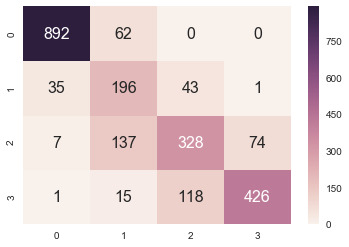

In [110]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
cls = LogisticRegression

In [46]:
params = {
    #'C': [0.1, 1.0, 10.0],
    'class_weight': ['balanced'],
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'multi_class': ['ovr', 'multinomial'],
    #'max_iter': [10, 50, 100, 200, 500]
}

In [47]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)
len(list(ParameterGrid(params)))

8

In [48]:
%%time
gs.fit(features, labels)

Wall time: 40.7 s


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score=0,
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'class_weight': ['balanced'], 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 'multi_class': ['ovr', 'multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [49]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.78975, std: 0.01405, params: {'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg'},
 mean: 0.77782, std: 0.00717, params: {'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'lbfgs'},
 mean: 0.77598, std: 0.00506, params: {'class_weight': 'balanced', 'multi_class': 'ovr', 'solver': 'newton-cg'},
 mean: 0.76441, std: 0.01641, params: {'class_weight': 'balanced', 'multi_class': 'ovr', 'solver': 'lbfgs'},
 mean: 0.52075, std: 0.02921, params: {'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'sag'},
 mean: 0.51432, std: 0.02773, params: {'class_weight': 'balanced', 'multi_class': 'ovr', 'solver': 'sag'},
 mean: 0.50331, std: 0.03032, params: {'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'saga'},
 mean: 0.49688, std: 0.03023, params: {'class_weight': 'balanced', 'multi_class': 'ovr', 'solver': 'saga'}]

accuracy:  0.791862955032

             precision    recall  f1-score   support

          1       0.96      0.93      0.94       954
          2       0.49      0.76      0.59       275
          3       0.69      0.60      0.64       546
          4       0.84      0.77      0.80       560

avg / total       0.81      0.79      0.80      2335

macro precision:  0.744281399581
micro precision:  0.791862955032

micro recall:  0.791862955032
macro recall:  0.763095137305

micro f1:  0.791862955032
macro f1:  0.744882006699


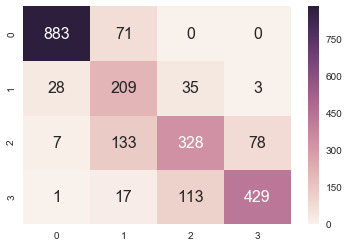

In [50]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
cls = KNeighborsClassifier

In [87]:
params = {
    'n_neighbors': [5, 10, 20, 50, 100, 200, 500, 1000],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

In [88]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)

In [89]:
len(list(ParameterGrid(params)))

64

In [90]:
%%time
gs.fit(features, labels)

Wall time: 3min 5s


GridSearchCV(cv=5, error_score=0,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5, 10, 20, 50, 100, 200, 500, 1000], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [91]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.77892, std: 0.01434, params: {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'},
 mean: 0.77892, std: 0.01434, params: {'algorithm': 'ball_tree', 'n_neighbors': 20, 'weights': 'distance'},
 mean: 0.77892, std: 0.01434, params: {'algorithm': 'kd_tree', 'n_neighbors': 20, 'weights': 'distance'},
 mean: 0.77892, std: 0.01434, params: {'algorithm': 'brute', 'n_neighbors': 20, 'weights': 'distance'},
 mean: 0.77525, std: 0.01514, params: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.77525, std: 0.01514, params: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.77525, std: 0.01514, params: {'algorithm': 'kd_tree', 'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.77525, std: 0.01514, params: {'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.77176, std: 0.01882, params: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'},
 mean: 0.77176, std: 0.01882, params: {'algorithm': 'bal

accuracy:  0.777301927195

             precision    recall  f1-score   support

          1       0.90      0.98      0.94       954
          2       0.46      0.39      0.42       275
          3       0.63      0.64      0.64       546
          4       0.83      0.75      0.79       560

avg / total       0.77      0.78      0.77      2335

macro precision:  0.705761561387
micro precision:  0.777301927195

micro recall:  0.777301927195
macro recall:  0.690212122783

micro f1:  0.777301927195
macro f1:  0.696046920462


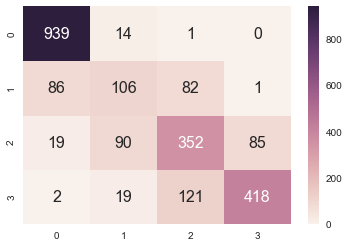

In [86]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

# Standardized data

In [3]:
df = pd.read_csv('data/normalized/robustscaler_boxcox.csv', index_col=0)

In [4]:
df = df[(df['ratio_running_duration_original'] >= 25) & (df['ratio_running_duration_original'] < 50)]

In [5]:
df.drop('ratio_running_duration_original', axis=1, inplace=True)

In [6]:
# split to train and test sets
features, featuresCV, labels, labelsCV = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.30, random_state=16)

In [7]:
features.shape

(5446, 40)

# LDA

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [106]:
cls = LinearDiscriminantAnalysis

In [154]:
params = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.0001, 0.001, 0.01],
    'tol': [1e-4, 1e-3, 1e-1, 1e-10]
}

In [155]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)
len(list(ParameterGrid(params)))

60

In [156]:
%%time
gs.fit(features, labels)

Wall time: 8.31 s


GridSearchCV(cv=5, error_score=0,
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto', 0.0001, 0.001, 0.01], 'tol': [0.0001, 0.001, 0.1, 1e-10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [157]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.79416, std: 0.01425, params: {'shrinkage': None, 'solver': 'svd', 'tol': 0.0001},
 mean: 0.79416, std: 0.01425, params: {'shrinkage': None, 'solver': 'svd', 'tol': 0.001},
 mean: 0.79416, std: 0.01425, params: {'shrinkage': None, 'solver': 'svd', 'tol': 1e-10},
 mean: 0.79416, std: 0.01425, params: {'shrinkage': None, 'solver': 'lsqr', 'tol': 0.0001},
 mean: 0.79416, std: 0.01425, params: {'shrinkage': None, 'solver': 'lsqr', 'tol': 0.001},
 mean: 0.79416, std: 0.01425, params: {'shrinkage': None, 'solver': 'lsqr', 'tol': 0.1},
 mean: 0.79416, std: 0.01425, params: {'shrinkage': None, 'solver': 'lsqr', 'tol': 1e-10},
 mean: 0.79361, std: 0.01341, params: {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001},
 mean: 0.79361, std: 0.01341, params: {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001},
 mean: 0.79361, std: 0.01341, params: {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1},
 mean: 0.79361, std: 0.01341, params: {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-

accuracy:  0.796145610278

             precision    recall  f1-score   support

          1       0.95      0.93      0.94       954
          2       0.52      0.60      0.56       275
          3       0.69      0.62      0.65       546
          4       0.79      0.83      0.81       560

avg / total       0.80      0.80      0.80      2335

macro precision:  0.737431731249
micro precision:  0.796145610278

micro recall:  0.796145610278
macro recall:  0.7458532034

micro f1:  0.796145610278
macro f1:  0.740321583243


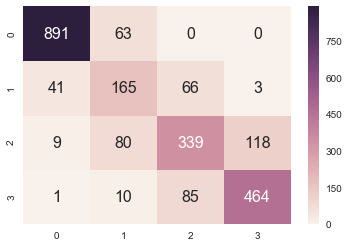

In [158]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)

# LinearSVC

In [159]:
from sklearn.svm import LinearSVC

In [160]:
cls = LinearSVC

In [181]:
params = {
    #'penalty': ['l1', 'l2'],
    #'loss': ['hinge', 'squared_hinge'],
    #'dual': [False, True],
    #'tol': [1e-4, 1e-3, 1e-1, 1e-10],
    'C': [1, 10, 20], 
    'multi_class': ['crammer_singer'],
    #'class_weight': [None, 'balanced'],
    #'max_iter': [10, 100, 1000, 10000]
}

In [182]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)
len(list(ParameterGrid(params)))

3

In [ ]:
%%time
gs.fit(features, labels)

In [ ]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

In [ ]:
# [mean: 0.79765, std: 0.01050, params: {'C': 10, 'class_weight': None, 'multi_class': 'crammer_singer'},

# MLP

In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
cls = MLPClassifier

In [14]:
params = {
    'hidden_layer_sizes': [(100,), (50,), (200,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.00001, 0.001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 300],
}

In [15]:
gs = GridSearchCV(cls(), params, scoring='accuracy', cv=5, n_jobs=-1, error_score=0)
len(list(ParameterGrid(params)))

36

In [16]:
%%time
gs.fit(features, labels)

Wall time: 6min 5s


GridSearchCV(cv=5, error_score=0,
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(100,), (50,), (200,)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [17]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80095, std: 0.00863, params: {'activation': 'identity', 'hidden_layer_sizes': (200,), 'solver': 'lbfgs'},
 mean: 0.79893, std: 0.00665, params: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'},
 mean: 0.79875, std: 0.00581, params: {'activation': 'identity', 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'},
 mean: 0.79857, std: 0.00889, params: {'activation': 'identity', 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'},
 mean: 0.79728, std: 0.00674, params: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'},
 mean: 0.79692, std: 0.01016, params: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'},
 mean: 0.79655, std: 0.01099, params: {'activation': 'logistic', 'hidden_layer_sizes': (200,), 'solver': 'lbfgs'},
 mean: 0.79563, std: 0.00580, params: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'},
 mean: 0.79471, std: 0.00702, params: {'activation': 'relu', 'hidden_layer_sizes': (200,), 

accuracy:  0.803854389722

             precision    recall  f1-score   support

          1       0.94      0.96      0.95       954
          2       0.58      0.49      0.53       275
          3       0.66      0.66      0.66       546
          4       0.79      0.82      0.81       560

avg / total       0.80      0.80      0.80      2335

macro precision:  0.744792126513
micro precision:  0.803854389722

micro recall:  0.803854389722
macro recall:  0.734658636699

micro f1:  0.803854389722
macro f1:  0.738620380683


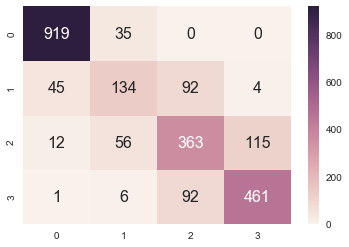

In [18]:
print_metrics(gs.best_estimator_, featuresCV, labelsCV)